In [48]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
import json
import numpy as np
%matplotlib inline

In [41]:
positions = json.load(open('posns.json'))


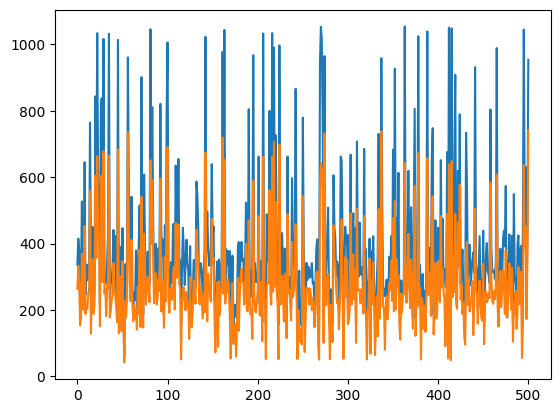

In [42]:
xs = [p['x'] for p in positions]
rhxs = [p['x'] + p['width'] for p in positions]
plt.plot(rhxs)

plt.plot(xs)

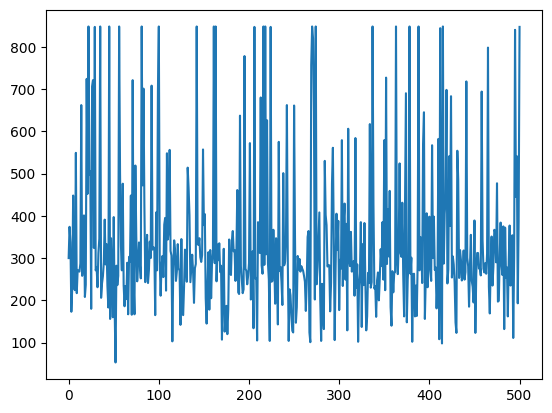

In [43]:
cms = [(2 * p['x'] + p['width']) / 2 for p in positions]
plt.plot(cms)

In [44]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

[40.260152960986304, 41.1897449924335, 43.011081657990445, 72.28056583979684, 76.40417031980608, 78.32863087583175, 79.36348209156289, 83.33954428359561, 107.03286790337397, 111.90456811702585, 112.13208453114387, 134.76561442188503, 135.3831940016348, 136.27119881309514, 137.33269112813156, 141.2208146901844, 163.6179589676046, 191.37007131213676, 192.26252579571275, 199.06481072507967, 200.86669837507807, 201.57405100155532, 235.95129153422297, 260.51776787682815, 286.8563186382976, 299.2252772883166, 300.68410047280486, 301.1367578180079, 310.8671539546494, 311.29839543908224, 313.5469680635657, 320.60872483701786, 322.45319009149637, 337.6213179117592, 339.44486077790725, 342.7234198099246, 343.1192491342546, 345.2066196637518, 350.73572458864953, 351.22016816135334, 354.7211015578527, 355.51745625220076, 369.92017840801026, 377.99478059548443, 378.027201069061, 379.7612318044405, 380.3047123557891, 381.46611086980613, 386.51011569319076, 390.8174136681429, 391.27211416283825, 405.

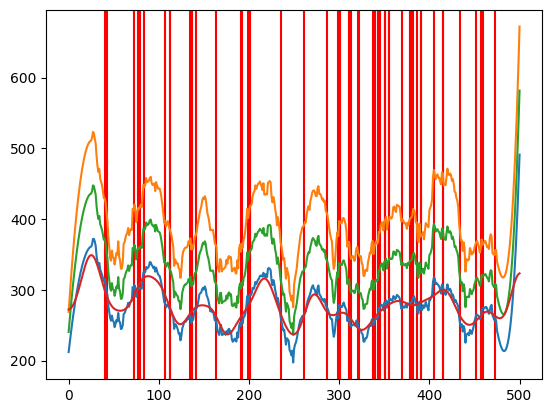

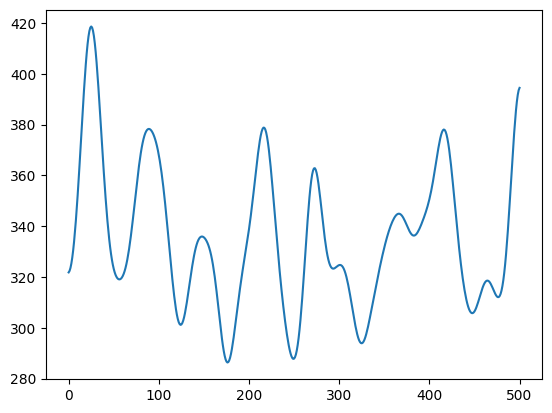

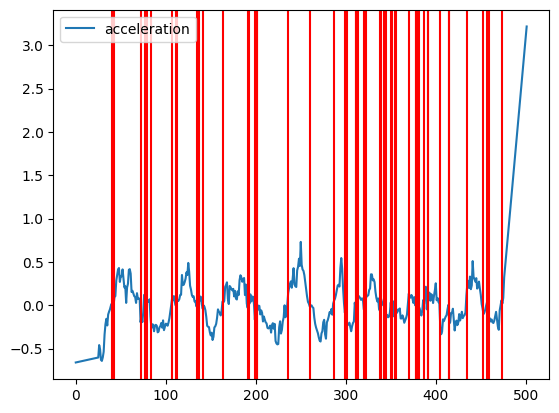

In [52]:

window = 51 
order = 3

def smooth_skier_position(position_data, method='savgol', **kwargs):
    if method == 'savgol':
        window = kwargs.get('window', 51)
        order = kwargs.get('order', 3)
        return savgol_filter(position_data, window, order)

    if method == 'ma':
        return moving_average(position_data, kwargs.get('window', 25))

    if method == 'gaussian':
        return gaussian_filter1d(position_data, kwargs.get('sigma', 10))

velocity = savgol_filter([0] + [p['x'] for p in positions], window, order, deriv=1)
acceleration = savgol_filter([0] + [p['x'] for p in positions], window, order, deriv=2)
inflection_points = []
for i in range(1, len(acceleration)):
    if acceleration[i] * acceleration[i - 1] <= 0:
        if acceleration[i-1] != acceleration[i]:
            t = -acceleration[i-1] / (acceleration[i] - acceleration[i-1])
            inflection_points.append(i + t)
        else:
            inflection_points.append(i)

print(inflection_points)
# plt.plot(xs)
# plt.plot(velocity, label='velocity')
for i in inflection_points:
    plt.axvline(x=i, color='r')
plt.plot(smooth_skier_position(xs, window=window, order=order))
plt.plot(smooth_skier_position(rhxs, window=window, order=order))
plt.plot(smooth_skier_position(cms, window=window, order=order))
plt.plot(smooth_skier_position(xs, method='gaussian'))

plt.show()
plt.plot(smooth_skier_position(cms, method='gaussian'))
plt.show()


plt.plot(acceleration, label='acceleration')
for i in inflection_points:
    plt.axvline(x=i, color='r')
plt.legend()
plt.show()